In [13]:
import numpy as np
import random
import cv2
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils

In [14]:
from keras.datasets import mnist # датасет рукописных цифр от 0-9, сначала будет скачиваться
(train_X, train_y), (test_X, test_y) = mnist.load_data()
classes = np.unique(train_y) # Определение какие классы есть в наборе через процедуру уникальных элементов массива
"""train_X = train_X[:10000]
train_y = train_y[:10000]
test_X = test_X[:100]
test_y = test_y[:100]""" # если будет долго можно будет таким образом сократить данные и ускорить обучение
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) # размерности тестовый и тренировочных данных

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


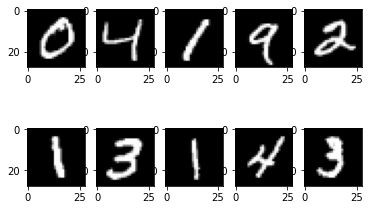

In [15]:
# Вывод первых 10 картинок тренировочных картинок
for i in range(1,11):
    plt.subplot(2, 5, i)
    plt.imshow(train_X[i], cmap='gray') # cmap - цветовая гамма

In [16]:
# Перевод в категориальные переменные
train_y = np_utils.to_categorical(train_y)
test_y = np_utils.to_categorical(test_y)
class_num = test_y.shape[1] # для количества выходных нейронов в последнем слое НС
test_y.shape

(10000, 10)

In [17]:
model = Sequential()
# Сверточный слой. Он будет принимать входные данные и пропускать их через сверточные фильтры.
# количество каналов (фильтров) 28, размер фильтра 4 x 4, форма входа (при создании первого слоя),Здесь input_shape задается так поскольку данный датасет имеет размерность 28,28 без указания количества каналов цветности, поэтому 3 аргументом стоит 1 что означает что картинки черно-белые, а также padding='same' это отступы, что означает если размер фильтра уходит за размер картинки он добавляет 0 - вые отступы
model.add(Conv2D(28, (4, 4), padding='same',input_shape=(len(train_X[0]),len(train_X[0][0]),1)))
model.add(Activation('relu')) #  функция активации
# исключающий слой для предотвращения переобучения, который случайным образом устраняет соединения между слоями
# (0,2 означает, что он отбрасывает 20% существующих соединений):
model.add(Dropout(0.2))
# Пакетная нормализация нормализует входные данные, поступающие в следующий слой, гарантируя,
# что сеть всегда создает функции активации с тем же распределением, которое нам нужно:
model.add(BatchNormalization())
# Объединяющий слой, который, помогает сделать классификатор изображений более корректным
# чтобы он мог изучать релевантные шаблоны.
model.add(MaxPooling2D(pool_size=(2, 2)))
# Cжимаем данные. Также добавим слой исключения снова:
model.add(Flatten())
# Используем импортированную функцию Dense и создаем первый плотно связанный слой.
# Нам нужно указать количество нейронов в плотном слое.
# Обратите внимание, что число нейронов в последующих слоях уменьшается,
# в конечном итоге приближаясь к тому же числу нейронов, что и классы в наборе данных (в данном случае 10).
# Ограничение ядра может упорядочить данные в процессе обучения, что также помогает предотвратить переобучение.
model.add(Dense(256, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
# Функция активации softmax выбирает нейрон с наибольшей вероятностью в качестве своего выходного значения,
# предполагая, что изображение принадлежит именно этому классу:
model.add(Dense(class_num))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 28)        476       
                                                                 
 activation_9 (Activation)   (None, 28, 28, 28)        0         
                                                                 
 dropout_3 (Dropout)         (None, 28, 28, 28)        0         
                                                                 
 batch_normalization_3 (Batc  (None, 28, 28, 28)       112       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 28)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 5488)             

In [18]:
model.compile(
    loss='categorical_crossentropy',
    optimizer= 'Adam',
    metrics=['accuracy']
)
model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=2, batch_size=128)

Epoch 1/2
469/469 [==============================] - 38s 79ms/step - loss: 0.1776 - accuracy: 0.9538 - val_loss: 0.0682 - val_accuracy: 0.9786
Epoch 2/2
469/469 [==============================] - 38s 82ms/step - loss: 0.0478 - accuracy: 0.9856 - val_loss: 0.0547 - val_accuracy: 0.9831


In [19]:
scores = model.evaluate(test_X, test_y, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 98.31%


(28, 28)
(1, 28, 28)
1/1 [==============================] - 0s 16ms/step
Output Label: 4
4 [[2.22911967e-11 1.17931631e-09 9.49074264e-10 5.15079090e-11
  9.99997616e-01 4.17222079e-09 9.12494691e-10 1.03345428e-06
  1.39574015e-08 1.28698650e-06]]


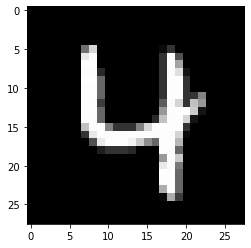

In [33]:
num_image=random.randint(0, len(test_X)) #  Рандомная картинка из всех тестовых
plt.imshow(test_X[num_image], cmap = 'gray')
resized_img = cv2.resize(test_X[num_image], (28,28)) # Изменение размера картинки где test_X[num_image] какая картинка, а (28,28) какой размер нам нужно получить
print(resized_img.shape)
resized_img= np.expand_dims(resized_img, axis=0) # Развертка формы массива.
print(resized_img.shape)
predict=model.predict(resized_img) # Предсказание вероятностей по каждому классу для картинки
n = np.argmax(predict) # Определение максимальной вероятности из предсказанных
print("Output Label:", n)
print(classes[n], predict)

n -  8  test -  3 index -  18
n -  9  test -  4 index -  115
n -  2  test -  4 index -  247
n -  6  test -  0 index -  297
n -  7  test -  2 index -  321
n -  5  test -  0 index -  324


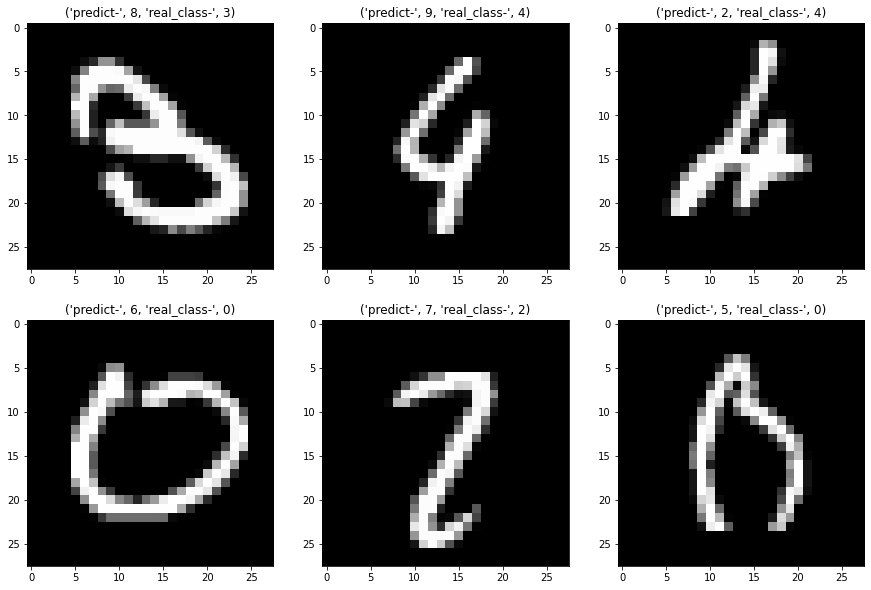

In [42]:
#Отрисовка 6 первых неправильно предсказанных картинок
raz = 0
plt.figure(figsize=(15, 10))
for i in range(1,len(test_X)):
    if raz == 6:
        break
    resized_img = cv2.resize(test_X[i], (28,28))
    resized_img = np.expand_dims(resized_img, axis=0)
    predict=model.predict(resized_img,verbose=0)
    classes_n = np.argmax(predict)
    if np.argmax(test_y[i]) != classes_n:
        raz = raz+1
        plt.subplot(2,3,raz)
        plt.imshow(test_X[i], cmap = 'gray')
        title = 'predict-',classes_n, 'real_class-', np.argmax(test_y[i])
        plt.title(title)
        print('n - ', classes_n , ' test - ', np.argmax(test_y[i]), 'index - ', i)